## &#x1F4C8; Signals in Time

### &#x1F3F7; Exploring a sound sample

In [1]:
using SignalAnalysis, SignalAnalysis.Units, Plots

In [2]:
cfpo = signal("data/cfpo1.wav");

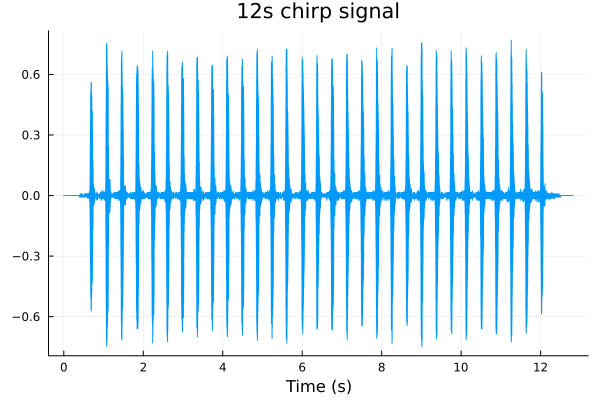

In [3]:
plot(cfpo, title = "12s chirp signal")

In [4]:
framerate(cfpo)

8000.0f0

In [5]:
nframes(cfpo)

102528

In [6]:
duration(cfpo)

12.816f0

In [7]:
t₀ = 2s;

In [8]:
t₁ = t₀ + 180ms
one_chirp = plot(cfpo[t₁:t₁ + 200ms], title = "Signal Excerpt at 2s");

In [9]:
t₂ = t₀ + 225ms
chirp_zoomed = plot(cfpo[t₂:t₂ + 10.1ms], title = "Chirp Zoomed for 10ms");

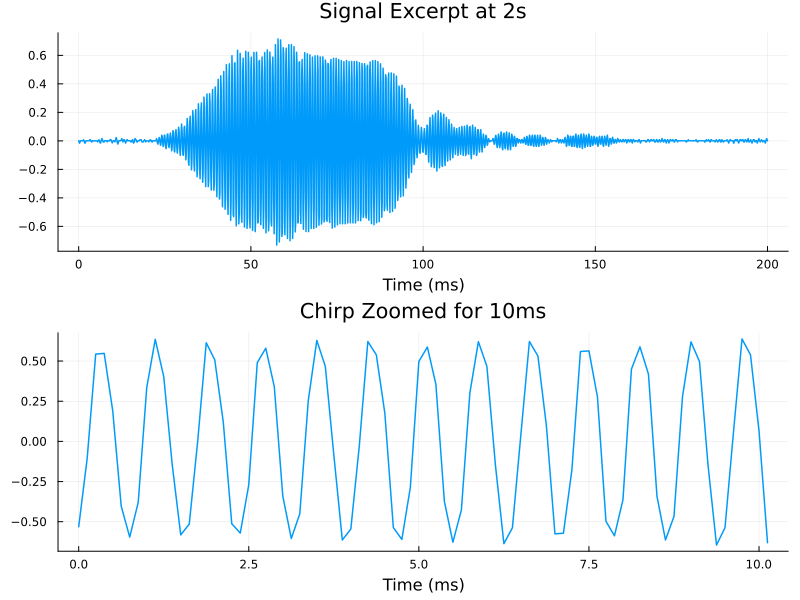

In [10]:
plot(one_chirp, chirp_zoomed
    ; layout=(2,1), size = ( 800, 600), linewidth = 1.5
)

### &#x1F3F7; Analysing Frequencies

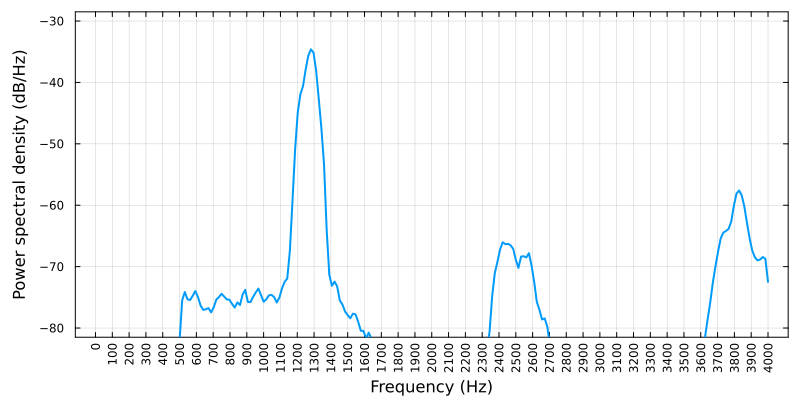

In [11]:
# Fourier spectrum of the call of an owl
psd(cfpo; xticks=0:100:4000
    , xrot=90
    , size = ( 800, 400), linewidth=2
    , widen =true
    , framestyle = :box
    , bottom_margin = 5Plots.mm, left_margin = 5Plots.mm
)

In [12]:
sp0 = specgram(cfpo; color=:grayC
    , size = (800, 300)
    , bottom_margin = 5Plots.mm, left_margin = 5Plots.mm
)
savefig(sp0, "images/sp0.png");

<img src="images/sp0.png" width='' height='' > </img>

### &#x1F3F7; Filtering

&#x1F4DD; Making filters with `fir()`

In [13]:
# Constructing a low-pass filter
lpf = fir(127, 0, 2kHz; fs=8kHz);

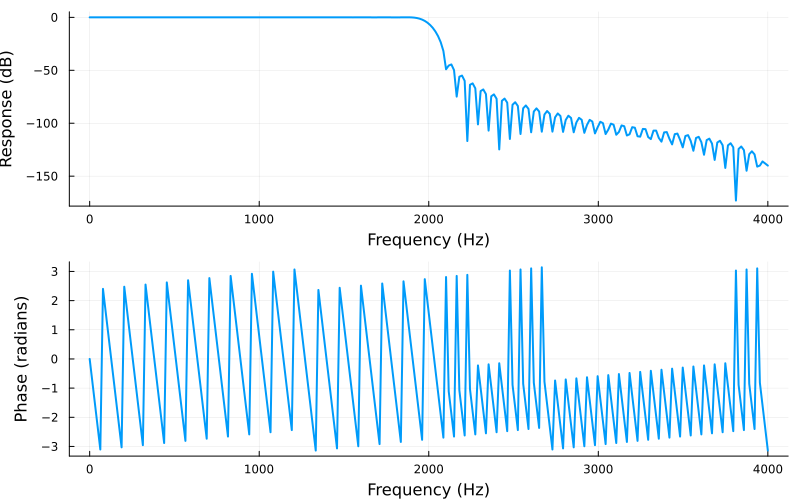

In [14]:
# Frequency reponse of a low-pass filter
plotfreqresp(lpf; fs=8000, linewidth=2    , size = (800, 500))

# &#x1F4DA; References
- [ ] [Practical Julia: A Hands-On Introduction for Scientific Minds by Lee Phillips](https://nostarch.com/practical-julia)